<a href="https://colab.research.google.com/github/zavarujs/-PREDICTION-SALES-GAMING-WITH-MACHINE-LEARNING/blob/main/prediksi_sales_gaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**

Industri permainan video adalah salah satu industri yang berkembang paling pesat di era modern dan sangat dipengaruhi oleh kemajuan teknologi. Dengan kemajuan seperti Augmented Reality (AR) dan Virtual Reality (VR) yang semakin tersedia dalam produk konsumen seperti konsol permainan dan bahkan ponsel pintar, sektor permainan menunjukkan potensi pertumbuhan yang sangat besar. Proyek ini bertujuan untuk memprediksi penjualan permainan video berdasarkan berbagai variabel yang ada.

Setelah mengunduh data.zip, kita menerima 3 file yaitu Sample submission, Train, dan Test.csv.

Deskripsi Data:
- Setelah folder di-zip, akan ada file-file berikut.
* Train.csv - 3506 observasi.
* Test.csv - 1503 observasi.
* Sample Submission - Format contoh untuk pengumpulan.
* Variabel Target: SalesInMillions

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Sample_Submission.csv to Sample_Submission.csv
Saving Test.csv to Test.csv
Saving Train.csv to Train.csv
User uploaded file "Sample_Submission.csv" with length 28028 bytes
User uploaded file "Test.csv" with length 106025 bytes
User uploaded file "Train.csv" with length 312881 bytes


# File Imports

In [ ]:
#Import necessary libraries

# statistik / analisa
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split

# logging/ software bugs
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Read the csv files
input = pd.read_csv("Train.csv")
input.shape

(3506, 9)

di sini menujukkan bahwa di dalam dataset train.csv ada sebanyak 3506 observasi yakni 3506 baris dengan ada 9 kolom

In [ ]:
input = pd.read_csv("Train.csv")

In [ ]:
#print all columns to understand the dataset
input.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


# Data cleaning

In [ ]:
input.isnull().sum()

ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

Tidak ada nilai null dalam dataset. Jadi, kita dapat beralih ke langkah berikutnya yaitu menghapus kolom yang tidak diperlukan.

Dari dataset, kita dapat mengamati bahwa kecuali kolom id, semua kolom lainnya memainkan peran yang signifikan dalam penjualan akhir permainan video. Jadi, kolom tersebut dapat dihapus.

In [ ]:
input = input.drop(columns=['ID'])
train, test = train_test_split(input, test_size=0.2, random_state=42, shuffle=True)

selanjutnya kita menghapus kolom ID karena kolom ID tidak dibutuhkan dalam prediksi penjualan game dan juga untuk meningkatkan efisiensi analisis. kemudian dataset dibagi menjadi set pelatihan dan pengujian dengan rasio 80:20 menggunakan fungsi train_split_test.

# Descriptive Statistics

In [ ]:
train.shape, test.shape

((2804, 8), (702, 8))

dapat diketahui setelah pembagain rasio 80:20 yang telah dilakukan:

1. 2408 sample dalam dataset train dengan 8 jumlah fitur
2. 702 sample dalam datatset test dengan 8 jumalah fitur yang sama

total data awal adalah 3506 sample (2804+702) dan data juga sudah dibagi menjadi 80:20. dan perbandingan ini konsisten dengan penggunaan fungsi train_test_split() dengan test_size=0.2, yang berarti 20% data digunakan untuk pengujian dan sisanya 80% untuk pelatihan

In [ ]:
train.nunique() # melihat berapa banyak jumlah nilai unik untuk setiap kolom

CONSOLE              17
YEAR                 23
CATEGORY             12
PUBLISHER           184
RATING                6
CRITICS_POINTS     1499
USER_POINTS        1875
SalesInMillions    2804
dtype: int64

In [ ]:
train.describe(percentiles=[.20]) # membuat ringkasan statistik dengan kolom numerik

,YEAR,CRITICS_POINTS,USER_POINTS,SalesInMillions
count,2804.000000,2804.000000,2804.000000,2804.000000
mean,2008.982168,3.748742,0.403144,2.184942
std,4.286690,3.101958,0.455677,2.578479
min,1997.000000,0.568966,0.000341,0.001524
20%,2005.000000,1.564585,0.046204,0.779476
50%,2009.000000,2.745968,0.229331,1.863315
max,2019.000000,23.250000,2.325000,84.226041



Dari tabel di atas, wawasan pertama saya adalah saya dapat dengan mudah membuat diagram batang dari kolom console, year, category, dan ratings. Untuk kolom-kolom lainnya, mungkin saya perlu mencari representasi visual lain karena jumlah nilai uniknya tinggi.

* Dari kolom SalesInMillions, kita dapat melihat bahwa penjualan rata-rata berada di sekitar 2 juta dan penjualan maksimum mencapai sekitar 84 juta, sedangkan penjualan minimum hanya sekitar 1500.
* Dari kolom year, kita dapat melihat bahwa data mencakup penjualan dari tahun 1997 hingga 2019.
* Critic Points berkisar antara 0.5 hingga 23.25 sementara user points berkisar antara 0.0003 hingga 2.32. Kita mungkin perlu menormalkan nilai-nilai ini ke dalam skala yang sama agar poin kritikus tidak memiliki dampak yang lebih besar daripada poin pengguna pada prediksi akhir, meskipun dalam kenyataannya keduanya seharusnya memiliki bobot yang sama.



# EDA

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.8 MB 35.8 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.9 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356239 sha256=28efbacdc5fc6d562f3fbe72973b96ed420656d09fb19db2e6c3f6fc7a281d2d
  Stored in directory: /tmp/pip-ephem-wheel-cache-ewycq220/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=92ddf3e2982faadd0900ae002561590d6d20139ef63c5a08b22c9950e38e400c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built ydata-profiling htmlmin


In [ ]:
from pandas_profiling import ProfileReport
report = ProfileReport(train, title="Report", html={'style': {'full_width':True}}, explorative=True, missing_diagrams={'bar': True})

In [ ]:
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Save the report in file
report.to_file("pandas_profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Dari laporan di atas, kita dapat memperoleh wawasan-wawasan berikut:-   
*   Console column graph:   
<img src="https://res.cloudinary.com/dk22rcdch/image/upload/v1595439244/VideoGameDatasetAnalysisImages/Screenshot_2020-07-22_at_11.02.44_PM_nxz5cm.png" width=400>      
Penjualan **PS2** adalah yang paling tertinggi.

*   Years Column graph:   
<img src="https://res.cloudinary.com/dk22rcdch/image/upload/v1595439371/VideoGameDatasetAnalysisImages/Screenshot_2020-07-22_at_11.05.51_PM_ycn3nl.png" width=400>  
Penjualan Tertinggi pada periode **2005-2010**.

*   Game category column graph:   
<img src="https://res.cloudinary.com/dk22rcdch/image/upload/v1595439531/VideoGameDatasetAnalysisImages/Screenshot_2020-07-22_at_11.08.40_PM_ugwpdi.png" width=400>   
  **Action** kategori game paling populer

Sekarang mari kita bandingkan kolom-kolom individu dengan kolom target (SalesInMillions) untuk mendapatkan beberapa wawasan lebih lanjut tentang data.

In [ ]:
#Sales of games that happened corresponding to each console.
df = pd.DataFrame(train.groupby(['CONSOLE']).agg({'SalesInMillions': 'sum'}))

<Axes: xlabel='CONSOLE'>

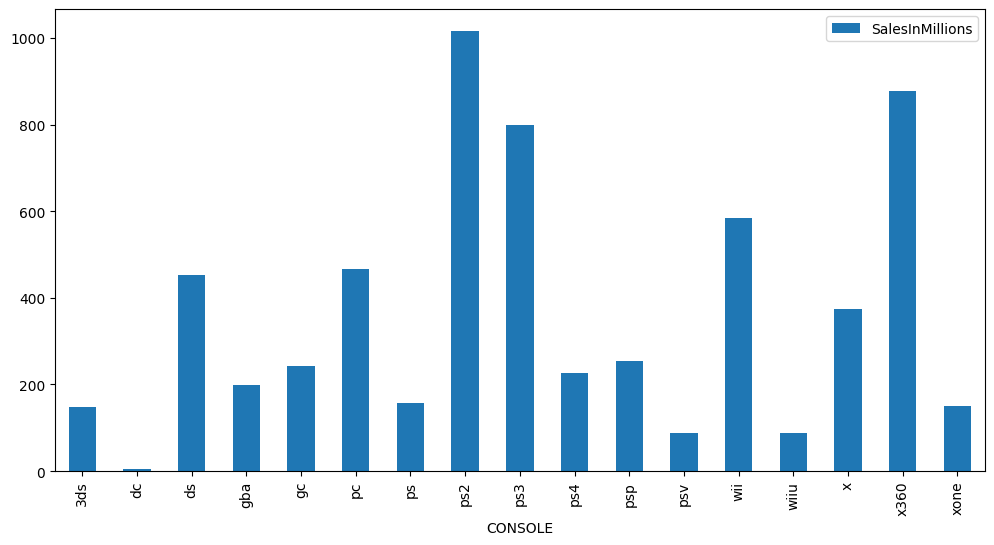

In [ ]:
df.plot.bar(figsize=(12, 6))

**💡Dari grafik di atas, kita dapat melihat bahwa penjualan tertinggi terjadi untuk platform PS2, diikuti oleh Xbox360.

In [ ]:
df = pd.DataFrame(train.groupby(['YEAR']).agg({'SalesInMillions': 'sum'}))

<Axes: xlabel='YEAR'>

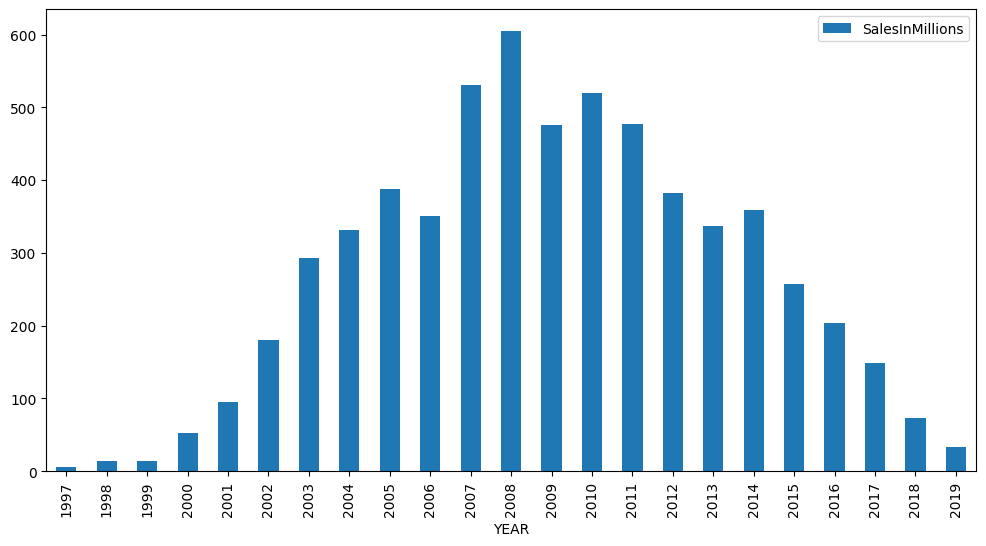

In [ ]:
df.plot.bar(figsize=(12, 6))

**💡
Dari grafik di atas, kita dapat melihat bahwa penjualan tertinggi terjadi pada tahun 2008.

In [ ]:
df = pd.DataFrame(train.groupby(['CATEGORY']).agg({'SalesInMillions': 'sum'}))

<Axes: xlabel='CATEGORY'>

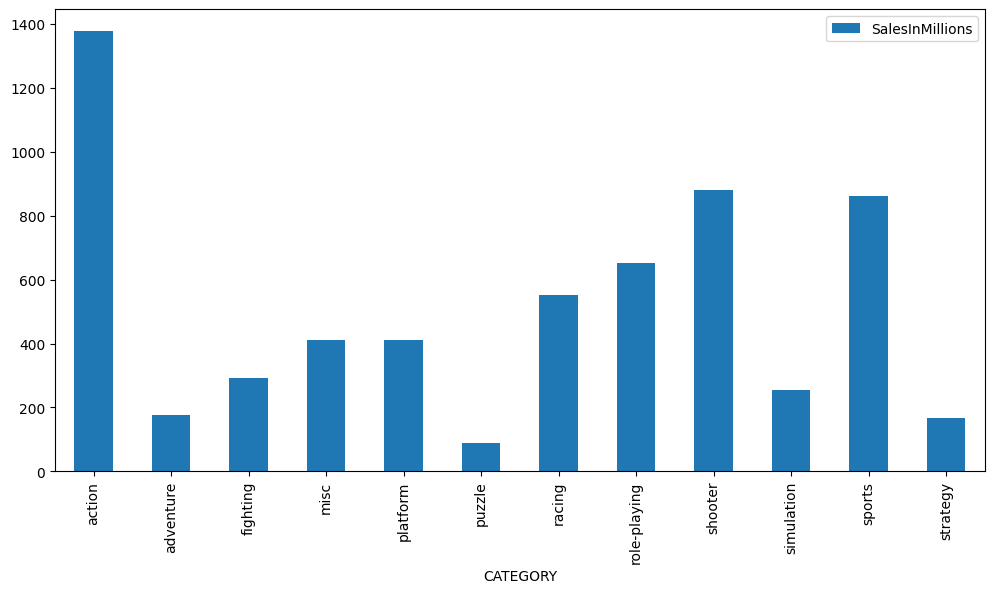

In [ ]:
df.plot.bar(figsize=(12, 6))

**💡Insight**:  Dari grafik di atas, kita dapat melihat bahwa penjualan tertinggi terjadi untuk genre aksi.


# Model training

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.9 MB/s eta 0:00:00


In [ ]:
import catboost as cat
cat_feat = ['CONSOLE','CATEGORY', 'PUBLISHER', 'RATING']
features = list(set(train.columns)-set(['SalesInMillions'])) #independent / predictors
target = 'SalesInMillions' # dependent / target
model = cat.CatBoostRegressor(random_state=100,cat_features=cat_feat,verbose=0)
model.fit(train[features],train[target])

1. mendefinisikan fitur-fitur berisi data kategorikal
2. pemilihan fitur semua kolom kecuali SalesInMillions, yang akan menjadi variabel target
3. menentukan kolom yang akan diprediksi model yaitu SalesInMillions
4. inisialisasi model menggunakan catboostregressor, lalu untuk menggunakan random_state=100 untuk reprodusibilitas (kemampuan untuk menghasilkan hasil yang sama atau sangat mirip ketika eksperimen atau analisis diulang dalam kondisi yang sama), kemudian menentukan fitur kategorikal yang telah didefinisikan sebelumnya menggunakan cat_features_feat dan juga mematikan output log selama pelatihan menggunakan verbose=0
5. pelatihan model dilatih menggunakan metode fit(). train[features] adalah input fitur dari data pelatihan dan train[target] adalah nilai target yang sesuai

# Model Accuracy

In [ ]:
y_true= pd.DataFrame(data=test[target], columns=['SalesInMillions'])
test_temp = test.drop(columns=[target])

persiapan data menggunakan y_true (Membuat DataFrame yang berisi nilai aktual penjualan dari set pengujian) dan test_temp (Membuat salinan set pengujian tanpa kolom target SalesInMillions)

In [ ]:
y_pred = model.predict(test_temp[features])

Menggunakan model yang telah dilatih untuk memprediksi penjualan berdasarkan fitur-fitur dalam set pengujian.

In [ ]:
y_pred

array([ 3.03390586,  1.73496173, 12.87422201,  2.03782956,  1.60536051,
        2.28840921,  4.35883779,  3.89997057,  2.04756266,  1.76194005,
        1.78222678,  1.80386755,  1.40104551,  2.30967057,  1.60835577,
        1.62805732,  1.70487032,  2.2668703 ,  1.54398097,  2.02341267,
        1.99118295,  1.80080743,  1.84262792,  2.07492745,  1.9011021 ,
        1.85146506,  3.11765734,  1.62386502,  1.82240705,  1.85106055,
        2.11247751,  2.88373833,  1.83455959,  1.38261849,  1.8134051 ,
        1.68407514,  1.9523002 ,  1.54876831,  1.85184235,  1.43039116,
        1.31133025,  2.32464209,  2.37844985,  2.01351385,  1.51530294,
        1.65655451,  1.66540699,  1.38509482,  1.72696142,  1.56572391,
        1.57549682,  1.61537946,  1.90930737,  1.71215622,  1.20844828,
        7.66444246,  1.63561657,  2.32488372,  1.60878933,  5.02674352,
        1.87067475,  2.69033216,  1.68100466,  3.72056132,  1.80460194,
        1.65353742,  2.40598099,  1.49580674,  1.78656375,  1.39

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

1.5433837569886446


melakukan perhitungan error dengan menggunakan RMSE. Mengimpor fungsi mean_squared_error dari scikit-learn dan fungsi sqrt dari modul math. dan RMSE juga menujukkan bahwa degan evelauasi model kita yaitu 1.54 yang berarti hanyak sekitar 1,54 juta unit saja saja yang meleset dari penjualan yang sebenarnya yakni 84 juta

# Prediction

In [ ]:
test_temp[features].head(1)

,CATEGORY,PUBLISHER,YEAR,CRITICS_POINTS,USER_POINTS,CONSOLE,RATING
3272,shooter,Take-Two Interactive,2015,2.806452,0.009848,ps3,M


In [ ]:
model.predict(test_temp[features].head(1))

array([3.03390586])

memprediksi penjualan untuk satu entri data. head(1) mengambil baris pertama dari data uji, dan model.predict() digunakan untuk memprediksi penjualan untuk entri tersebut.
Bagian prediksi ini mendemonstrasikan bagaimana model yang telah dilatih dapat digunakan untuk memprediksi penjualan game berdasarkan fitur-fiturnya, serta bagaimana kinerja model dievaluasi menggunakan metrik RMSE. Prediksi ini bisa digunakan untuk memperkirakan penjualan game baru atau untuk menganalisis faktor-faktor yang mempengaruhi penjualan game.

Output yang didapatkan adalah sebesar 3, nilai ini merupakan prediksi penjualan dalam jutaan unit untuk baris data pertama dari dataset test. Artinya, model memprediksi bahwa game pada sample prediksi bahwa vidio game pada baris pertama dataset test akan terjual 3 juta untit. Dan dengan prediksi ini menunjukkan bahwa model bisa memperkirakan game tersebut akan memiiki penjualan yang cukup baik, meskipun tidak tinggi.  Angka ini konsisten dengan skala penjualan yang umumnya dilihat dalam industri game, di mana penjualan beberapa unit dianggap sukses untuk banyak judul game vidio.